In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
from tqdm import tqdm

In [2]:
site = 'https://hmdb.ca/metabolites/HMDB0000821'

response = requests.get(site)
response

<Response [200]>

In [3]:
response.content

b'<!DOCTYPE html><html><head><link href="/assets/favicon-9531cde275d5419775671ec3320c1245747b762c98fb8c2d800f1ddfdb4f42c9.png" rel="icon" type="image/png" /><meta content="width=device-width, initial-scale=1.0" name="viewport" /><meta content="text/html; charset=UTF-8" http-equiv="Content-Type" /><title>Human Metabolome Database: Showing metabocard for Phenylacetylglycine (HMDB0000821)</title><link rel="stylesheet" media="all" href="/assets/application-b70dd1c08f568ecaf6e6eb20561c1a274178af5b7c630150e26b47b1c67b70ea.css" data-turbolinks-track="true" /><script src="/assets/application-c1b8235d74cff74e23a3b1186e2389a5a5ad83ce96d3df292151c216ab02d4fe.js" media="all" data-turbolinks-track="true"></script><!-- HTML5 Shim and Respond.js IE8 support of HTML5 elements and media queries -->\n<!--[if lt IE 9]>\n  <script src="https://oss.maxcdn.com/libs/html5shiv/3.7.0/html5shiv.js"></script>\n  <script src="https://oss.maxcdn.com/libs/respond.js/1.4.2/respond.min.js"></script>\n<![endif]--><scr

In [4]:
soup = BeautifulSoup(response.content, 'html.parser')

In [5]:
soup

<!DOCTYPE html>
<html><head><link href="/assets/favicon-9531cde275d5419775671ec3320c1245747b762c98fb8c2d800f1ddfdb4f42c9.png" rel="icon" type="image/png"/><meta content="width=device-width, initial-scale=1.0" name="viewport"/><meta content="text/html; charset=utf-8" http-equiv="Content-Type"/><title>Human Metabolome Database: Showing metabocard for Phenylacetylglycine (HMDB0000821)</title><link data-turbolinks-track="true" href="/assets/application-b70dd1c08f568ecaf6e6eb20561c1a274178af5b7c630150e26b47b1c67b70ea.css" media="all" rel="stylesheet"/><script data-turbolinks-track="true" media="all" src="/assets/application-c1b8235d74cff74e23a3b1186e2389a5a5ad83ce96d3df292151c216ab02d4fe.js"></script><!-- HTML5 Shim and Respond.js IE8 support of HTML5 elements and media queries -->
<!--[if lt IE 9]>
  <script src="https://oss.maxcdn.com/libs/html5shiv/3.7.0/html5shiv.js"></script>
  <script src="https://oss.maxcdn.com/libs/respond.js/1.4.2/respond.min.js"></script>
<![endif]--><script type=

In [7]:
table = soup.find("table", class_="content-table table table-condensed table-bordered")
table

<table class="content-table table table-condensed table-bordered"><tbody><tr id="record-information"><th class="divider" colspan="2">Record Information</th></tr><tr><th>Version</th><td>5.0</td></tr><tr><th>Status</th><td>Detected and Quantified</td></tr><tr><th>Creation Date</th><td>2006-05-22 15:12:24 UTC</td></tr><tr><th>Update Date</th><td>2023-02-21 17:16:30 UTC</td></tr><tr><th>HMDB ID</th><td>HMDB0002994</td></tr><tr><th>Secondary Accession Numbers</th><td class="acc-num"><ul><li>HMDB0094689</li>
<li>HMDB02994</li>
<li>HMDB94689</li></ul></td></tr><tr id="identification"><th class="divider" colspan="2">Metabolite Identification</th></tr><tr><th>Common Name</th><td><strong>Erythritol</strong></td></tr><tr><th>Description</th><td class="met-desc">Erythritol is a sugar alcohol (or polyol), used as a food additive and sugar substitute. It is naturally occurring and is made from corn using enzymes and fermentation. Its formula is C4H10O4, or HO(CH2)(CHOH)2(CH2)OH; specifically, one pa

In [8]:
table.find_all("tbody")[0]

<tbody><tr id="record-information"><th class="divider" colspan="2">Record Information</th></tr><tr><th>Version</th><td>5.0</td></tr><tr><th>Status</th><td>Detected and Quantified</td></tr><tr><th>Creation Date</th><td>2006-05-22 15:12:24 UTC</td></tr><tr><th>Update Date</th><td>2023-02-21 17:16:30 UTC</td></tr><tr><th>HMDB ID</th><td>HMDB0002994</td></tr><tr><th>Secondary Accession Numbers</th><td class="acc-num"><ul><li>HMDB0094689</li>
<li>HMDB02994</li>
<li>HMDB94689</li></ul></td></tr><tr id="identification"><th class="divider" colspan="2">Metabolite Identification</th></tr><tr><th>Common Name</th><td><strong>Erythritol</strong></td></tr><tr><th>Description</th><td class="met-desc">Erythritol is a sugar alcohol (or polyol), used as a food additive and sugar substitute. It is naturally occurring and is made from corn using enzymes and fermentation. Its formula is C4H10O4, or HO(CH2)(CHOH)2(CH2)OH; specifically, one particular stereoisomer with that formula. Erythritol is 60–70% as s

In [22]:
smiles = []
inchi = []
for row in table.find_all("tbody")[0]('tr'):
    th = row.find('th')
    if th and th.text == 'SMILES':
        smi = row.find_all("div")[0].contents[0]
        smiles.append(smi)
    if th and th.text == 'InChI Identifier':
        inchik = row.find_all("div")[0].contents[0]
        inchi.append(inchik)

In [24]:
smiles, inchi

(['CN1C=NC(C[C@H](N)C(O)=O)=C1'],
 ['InChI=1S/C7H11N3O2/c1-10-3-5(9-4-10)2-6(8)7(11)12/h3-4,6H,2,8H2,1H3,(H,11,12)/t6-/m0/s1'])

In [26]:
dicti = {'Smiles': smiles, 'Inchikey':inchi}
pd.DataFrame(dicti).to_csv('/home/jefferson/tuliomentorado.csv', sep=';', index=False)

In [ ]:
pd.DataFrame(dicti).to

# Fazer um script com o formato a seguir

In [334]:
!pip3 install selenium

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 40.9 MB/s eta 0:00:00m eta 0:00:010:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 400.2/400.2 kB 64.5 MB/s eta 0:00:00
  Using cached exceptiongroup-1.1.3-py3-none-any.whl (14 kB)

[notice] A new release of pip is available: 23.1.2 -> 23.3.1
[notice] To update, run: pip install --upgrade pip


In [85]:
import re

In [15]:
site = 'https://hmdb.ca/metabolites/HMDB0094689'
#site = 'https://hmdb.ca/metabolites/HMDB0001008'
#site = 'https://hmdb.ca/metabolites/HMDB0002994'
#site = 'https://hmdb.ca/metabolites/HMDB0000055'
#site = 'https://hmdb.ca/metabolites/HMDB0006228'
site = 'https://hmdb.ca/metabolites/HMDB0000821' #possui 1H e 13C experimental
site = 'https://hmdb.ca/metabolites/HMDB0000050' #possui 1H e 13C exp
#site = 'https://hmdb.ca/metabolites/HMDB0000057' #wrong molecule

response = requests.get(site)
soup = BeautifulSoup(response.content, 'html.parser')

In [392]:
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
import time
#pegando os dados do espectro
data = {'ExperimentalNMR': ['https://hmdb.ca/spectra/nmr_one_d/1920', '1H NMR Spectrum (1D, 500 MHz, H2O, experimental)'], 'PredictedNMR_500Hz': ['https://hmdb.ca/spectra/nmr_one_d/10511', '1H NMR Spectrum (1D, 500 MHz, D2O, predicted)']}

def getNMRdata(infolink:list, souphtml:BeautifulSoup, time2wait:int = 4):

    dataextracted = {'ExperimentalNMRDATA':np.nan, 'PredictedNMRDATA':np.nan}

    if infolink['ExperimentalNMR'] != np.nan:
        try:
            link_ = list(infolink['ExperimentalNMR'])[0]

            options = webdriver.ChromeOptions()
            options.add_argument("javascript.enabled=true")
            options.add_argument('--headless')  # Executar em modo headless (sem interface gráfica)
            with webdriver.Chrome(options=options) as driver:
                driver.get(link_)
                # Aguarde o carregamento da página (ajuste o tempo se necessário)
                #WebDriverWait(driver, 30).until(EC.url_contains((link_)))
                #driver.implicitly_wait(60) 
                time.sleep(time2wait)
                #table = WebDriverWait(driver, 5).until(EC.presence_of_element_located((By.CLASS_NAME, "specdb-nmr-one-d-c  show-a")))
                # Obtenha o HTML da página após o JavaScript ter sido executado
                soup = BeautifulSoup(driver.page_source, 'html.parser')

            table = soup.find("table", class_="jsv-assignment-table").find("tbody")

            # Inicializar listas vazias para cada coluna
            cluster_midpoints = []
            no_peaks = []
            coupling_types = []
            no_hs = []
            atom_nos = []
            peak_centers = []

            # Iterar sobre cada linha <tr> na tabela
            for tr in table.select('tbody tr'):
                tds = tr.find_all('td')

                # Adicionar conteúdo das células às listas
                cluster_midpoints.append(float(tds[1].text.strip()))
                no_peaks.append(int(tds[2].text.strip()))
                coupling_types.append(tds[3].text.strip())
                no_hs.append(int(tds[4].text.strip()))

                # Para os números dos átomos e os centros de pico, temos que lidar com múltiplas entradas dentro de uma única célula
                atom_nos.append([int(div.text) for div in tds[5].find_all('div', class_='jsv-badge')])
                peak_centers.append([float(span.text) for span in tds[7].find_all('span', class_='jsv-badge')])

            dataextracted['ExperimentalNMRDATA'] = [[cluster_midpoints,no_peaks,coupling_types,no_hs,atom_nos,peak_centers],list(infolink['ExperimentalNMR'])[1]]
        except:        
            pass

    if infolink['PredictedNMR_500Hz'] != np.nan:
        try:
            link_ = list(infolink['PredictedNMR_500Hz'])[0]
            options = webdriver.ChromeOptions()
            options.add_argument("javascript.enabled=true")
            options.add_argument('--headless')  # Executar em modo headless (sem interface gráfica)
            with webdriver.Chrome(options=options) as driver:
                driver.get(link_)
                # Aguarde o carregamento da página (ajuste o tempo se necessário)
                #WebDriverWait(driver, 30).until(EC.url_contains((link_)))
                #driver.implicitly_wait(60) 
                time.sleep(time2wait)
                #table = WebDriverWait(driver, 5).until(EC.presence_of_element_located((By.CLASS_NAME, "specdb-nmr-one-d-c  show-a")))
                # Obtenha o HTML da página após o JavaScript ter sido executado
                soup = BeautifulSoup(driver.page_source, 'html.parser')

            table = soup.find("table", class_="jsv-assignment-table").find("tbody")

            # Inicializar listas vazias para cada coluna
            cluster_midpoints = []
            no_peaks = []
            coupling_types = []
            no_hs = []
            atom_nos = []
            peak_centers = []

            # Iterar sobre cada linha <tr> na tabela
            for tr in table.select('tbody tr'):
                tds = tr.find_all('td')

                # Adicionar conteúdo das células às listas
                cluster_midpoints.append(float(tds[1].text.strip()))
                no_peaks.append(int(tds[2].text.strip()))
                coupling_types.append(tds[3].text.strip())
                no_hs.append(int(tds[4].text.strip()))

                # Para os números dos átomos e os centros de pico, temos que lidar com múltiplas entradas dentro de uma única célula
                atom_nos.append([int(div.text) for div in tds[5].find_all('div', class_='jsv-badge')])
                peak_centers.append([float(span.text) for span in tds[7].find_all('span', class_='jsv-badge')])

            dataextracted['PredictedNMRDATA'] = [[cluster_midpoints,no_peaks,coupling_types,no_hs,atom_nos,peak_centers],list(infolink['PredictedNMR_500Hz'])[1]]
        except:
            pass

    return dataextracted

getNMRdata(infolink=data,souphtml=soup)

{'ExperimentalNMRDATA': [[[3.77, 3.64],
   [2, 6],
   ['d', 'm'],
   [2, 4],
   [[16, 17], [10, 11, 12, 14]],
   [[3.78, 3.76], [3.68, 3.67, 3.64, 3.63, 3.62, 3.61]]],
  '1H NMR Spectrum (1D, 500 MHz, H2O, experimental)'],
 'PredictedNMRDATA': [[[75.47, 66.37, 66.37],
   [1, 1, 1],
   ['s', 's', 's'],
   [2, 1, 1],
   [[3, 5], [7], [2]],
   [[75.47], [66.37], [66.37]]],
  '1H NMR Spectrum (1D, 500 MHz, D2O, predicted)']}

In [17]:
import numpy as np
#pegando pegando link dos espectros espectros

tableinformation = soup.find_all('table', class_="table-inner nmr-table")
#hasExperimental = tableinformation[0].find_all(string='Experimental 1D NMR')
#hasPredicted = tableinformation[0].find_all(string=re.compile(r'^H.*?1D, 500 MHz, D$'))
label_link = {'ExperimentalNMR':np.nan,'PredictedNMR_500Hz':np.nan}

try:
    allspectra_tags = tableinformation[0].find_all("tbody")[0].find_all("tr")

    for tr in allspectra_tags:
        #print(tr.find('td'))
        #if tr.find('td').get_text() == 'Experimental 1D NMR':
        if tr.find('td').get_text() == 'Experimental 1D NMR' and '1H NMR Spectrum' in [tds.get_text() for tds in tr.find_all('td')][1]:    
            label_experimental = [tds.get_text() for tds in tr.find_all('td')][1]
            print(label_experimental)
            linktagEXP = tr.find('td').find_next_sibling('td').find_next_sibling('td').find_next_sibling('td').find_next_sibling('td').find('a')['href']
            link2nmrEXP = 'https://hmdb.ca'+linktagEXP

            label_link['ExperimentalNMR'] = [link2nmrEXP,label_experimental]

        if '1H NMR Spectrum (1D, 500 MHz' in tr.find('td').find_next_sibling("td").get_text() and 'predicted)' in tr.find('td').find_next_sibling("td").get_text():

            label_predicted = tr.find('td').find_next_sibling("td").get_text()

            linktagPRED = tr.find('td').find_next_sibling("td").find_next_sibling("td").find_next_sibling("td").find_next_sibling("td").find('a')['href']
            link2nmrPRED = 'https://hmdb.ca'+linktagPRED

            label_link['PredictedNMR_500Hz'] = [link2nmrPRED,label_predicted]
except:
    pass


print(label_link)

1H NMR Spectrum (1D, 500 MHz, H2O, experimental)
{'ExperimentalNMR': ['https://hmdb.ca/spectra/nmr_one_d/1053', '1H NMR Spectrum (1D, 500 MHz, H2O, experimental)'], 'PredictedNMR_500Hz': ['https://hmdb.ca/spectra/nmr_one_d/141980', '1H NMR Spectrum (1D, 500 MHz, D2O, predicted)']}


In [191]:
# Pegando propriedades fisico quimicas
pqprop_tags = soup.find('tr', id="physical_properties").find_next_sibling("tr").find_next_sibling("tr")
values = pqprop_tags.find_all('tbody')[0].find_all("tr")
[tr.find("td").find_next_sibling("td").get_text() for tr in values]


['229 - 230 °C', 'Not Available', '111 mg/mL at 15 °C', 'Not Available']

In [136]:
#Getting name, smiles and inchi

table = soup.find("table", class_="content-table table table-condensed table-bordered").find_all("tbody")[0]

smiles = []
inchi = []
name = []
casrn = []
for row in table('tr'):
    th = row.find('th')
    
    if th and th.text == 'SMILES':
        smi = row.find_all("div")[0].contents[0]
        smiles.append(smi)
    if th and th.text == 'InChI Identifier':
        inchik = row.find_all("div")[0].contents[0]
        inchi.append(inchik)
    if th and th.text == 'Common Name':
        molname = row.find_all("td")[0].get_text()
        name.append(molname)
    if th and th.text == 'CAS Registry Number':
        molcasrn = row.find_all("td")[0].get_text()
        casrn.append(molcasrn)

smiles,inchi,name,casrn

(['OC[C@H](O)[C@H](O)CO'],
 ['InChI=1S/C4H10O4/c5-1-3(7)4(8)2-6/h3-8H,1-2H2/t3-,4+'],
 ['Erythritol'],
 ['149-32-6'])

In [93]:
tableinformation = soup.find_all('table', class_="table-inner nmr-table")
tableinformation[0].find_all(string='Experimental 1D NMR'),tableinformation[0].find_all(string=re.compile(r'^H.*?1D, 500 MHz, D$'))

(['Experimental 1D NMR'], ['H NMR Spectrum (1D, 500 MHz, D'])

In [398]:
d = {'ExperimentalNMRDATA': [[[7.17, 6.95, 6.72, 3.51, 2.84, 1.87], [2, 1, 4, 4, 3, 1], ['d', 'm', 'dd', 'q', 't', 's'], [1, 2, 1, 2, 2, 3], [[25], [27, 30], [28], [21, 22], [23, 24], [17, 18, 19]], [[7.18, 7.16], [6.95], [6.73, 6.73, 6.72, 6.71], [3.53, 3.51, 3.5, 3.49], [2.86, 2.84, 2.83], [1.87]]], '1H NMR Spectrum (1D, 500 MHz, CDCl3, experimental)'], 'PredictedNMRDATA': np.nan}

In [450]:
pd.DataFrame([[1,2,3,4],[3,2,1,1]])

,0,1,2,3
0,1,2,3,4
1,3,2,1,1


In [501]:
get = pd.DataFrame([[1,2,3,4],[3,2,1,1]],columns=['a','b','c','d']).to_csv(index=False, sep=';',header=False).strip()

In [502]:
get

'1;2;3;4\n3;2;1;1'

In [505]:
import subprocess
subprocess.run(f'echo "{get}" >> file.txt', shell=True)


CompletedProcess(args='echo "1;2;3;4\n3;2;1;1" >> file.txt', returncode=0)

In [453]:
!ls

file.txt  HMDB_Webscraping.ipynb


In [443]:
initial = 1
final = 1000
for i in range(initial,final):
    if i % 100 == 0:
        print(i)

100
200
300
400
500
600
700
800
900


In [18]:
import requests
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
import time

from bs4 import BeautifulSoup
import pandas as pd
from tqdm import tqdm
import re
import numpy as np

import subprocess

class Scraping:
    def __init__(self,pathname: str):
        self.colnames = ['Name','Smiles','Inchi','CasRN','MeltingPoint',
                         'BoilingPoint','WaterSolubility_mg_mL','LogP','Ref',
                         'ppm_exp','n_peaks_exp','multiplicity_exp','n_Hs_exp','atom_number_exp','peak_centers_exp','ExperimentalConditions',
                         'ppm_pred','n_peaks_pred','multiplicity_pred','n_Hs_pred','atom_number_pred','peak_centers_pred','predCondition']
        self.df = pd.DataFrame(columns=self.colnames)
        self.pathname = pathname
        self.txtfile = self.df.to_csv(index=False, sep=';',header=True).strip()
        
        subprocess.run(f'echo "{self.txtfile}" >> {self.pathname}', shell=True)
    
    def fit(self, initialID:int = 0, finalID:int = 2, time2wait:int = 4):
        links = self._generateListOfLinks(initialID,finalID)
        for link in links:     
            print(link)
            html = requests.get(link)
            soupcontent = BeautifulSoup(html.content, 'html.parser')
            
            # Se der erro aqui é pq a pagina nao tem informação
            try:
                #Scraping do nome,smiles,inchi e casrn
                name,smiles,inchi,casrn = self._getSmilesAndInchi(souphtml=soupcontent)
            except:
                continue
            
            ### Pegando as propriedades fisicoquimicas
            mp,bp,solub,logp = self._getPQpropierties(souphtml=soupcontent)
            
            ### Pegando a lista de ppm e multiplicidades
            linksnmr = self.__getNMRInfo(souphtml=soupcontent)
            #print(linksnmr)
            nmrdatas = self._getNMRdata(infolink=linksnmr, time2wait = time2wait)
            #print(nmrdatas['ExperimentalNMRDATA'],nmrdatas)
            #experimental nmr
            if nmrdatas['ExperimentalNMRDATA'] == None:
                ppm_exp = np.nan
                n_peaks_exp = np.nan
                multiplicity_exp = np.nan
                n_Hs_exp = np.nan
                atom_number_exp = np.nan
                peak_centers_exp = np.nan
                exp_condition = np.nan
            else:                    
                ppm_exp = nmrdatas['ExperimentalNMRDATA'][0][0]
                n_peaks_exp = nmrdatas['ExperimentalNMRDATA'][0][1]
                multiplicity_exp = nmrdatas['ExperimentalNMRDATA'][0][2]
                n_Hs_exp = nmrdatas['ExperimentalNMRDATA'][0][3]
                atom_number_exp = nmrdatas['ExperimentalNMRDATA'][0][4]
                peak_centers_exp = nmrdatas['ExperimentalNMRDATA'][0][5]
                exp_condition = nmrdatas['ExperimentalNMRDATA'][1]
                
            #predicted nmr
            if nmrdatas['PredictedNMRDATA'] == None:
                ppm_pred = np.nan
                n_peaks_pred = np.nan
                multiplicity_pred = np.nan
                n_Hs_pred = np.nan
                atom_number_pred = np.nan
                peak_centers_pred = np.nan
                pred_condition = np.nan
            else:    
                ppm_pred = nmrdatas['PredictedNMRDATA'][0][0]
                n_peaks_pred = nmrdatas['PredictedNMRDATA'][0][1]
                multiplicity_pred = nmrdatas['PredictedNMRDATA'][0][2]
                n_Hs_pred = nmrdatas['PredictedNMRDATA'][0][3]
                atom_number_pred = nmrdatas['PredictedNMRDATA'][0][4]
                peak_centers_pred = nmrdatas['PredictedNMRDATA'][0][5]
                pred_condition = nmrdatas['PredictedNMRDATA'][1]
            
            #Criando o dataframe final
            listOfData = [name,smiles,inchi,casrn,mp,bp,solub,logp,link,
                          ppm_exp,n_peaks_exp,multiplicity_exp,n_Hs_exp,atom_number_exp,peak_centers_exp,exp_condition,
                          ppm_pred,n_peaks_pred,multiplicity_pred,n_Hs_pred,atom_number_pred,peak_centers_pred,pred_condition] #lista de todos os dados extraídos
            
            newdf = pd.DataFrame([listOfData],columns=self.colnames)
            self.df = pd.concat([self.df,newdf],axis=0).reset_index(drop=True)
            
            txtdata2file = newdf.to_csv(index=False, sep=';',header=False).strip()        
            subprocess.run(f'echo "{txtdata2file}" >> {self.pathname}', shell=True)
        return self.df            
            
    def _getPQpropierties(self,souphtml: BeautifulSoup):
        # Pegando propriedades fisico quimicas
        pqprop_tags = souphtml.find('tr', id="physical_properties").find_next_sibling("tr").find_next_sibling("tr")
        values = pqprop_tags.find_all('tbody')[0].find_all("tr")
        allprops = [tr.find("td").find_next_sibling("td").get_text() for tr in values]
        
        #Melting point, Boiling Point, Water Solubility, LogP
        return allprops[0],allprops[1],allprops[2],allprops[3]
    
    def _getSmilesAndInchi(self,souphtml: BeautifulSoup):
        #Getting name, smiles and inchi

        table = souphtml.find("table", class_="content-table table table-condensed table-bordered").find_all("tbody")[0]

        smiles = []
        inchi = []
        name = []
        casrn = []
        for row in table('tr'):
            th = row.find('th')

            if th and th.text == 'SMILES':
                smi = row.find_all("div")[0].contents[0]
                smiles.append(smi)
            if th and th.text == 'InChI Identifier':
                inchik = row.find_all("div")[0].contents[0]
                inchi.append(inchik)
            if th and th.text == 'Common Name':
                molname = row.find_all("td")[0].get_text()
                name.append(molname)
            if th and th.text == 'CAS Registry Number':
                molcasrn = row.find_all("td")[0].get_text()
                casrn.append(molcasrn)

        return name[0],smiles[0],inchi[0],casrn[0]   
        
    def _generateListOfLinks(self,initialID:int, finalID:int):
        links = []
        for id_ in range(initialID, finalID):
            
            qtd_zeros2complete = 7-len(str(id_))
            hmdb_id = 'HMDB'+'0'*qtd_zeros2complete+str(id_)
            link = 'https://hmdb.ca/metabolites/'+hmdb_id
            links.append(link)
        return links
    
    def _getNMRdata(self, infolink:list, time2wait:int = 4):

        dataextracted = {'ExperimentalNMRDATA':None, 'PredictedNMRDATA':None}

        if infolink['ExperimentalNMR'] != None:
            try:
                link_ = list(infolink['ExperimentalNMR'])[0]

                options = webdriver.ChromeOptions()
                options.add_argument("javascript.enabled=true")
                options.add_argument('--headless')  # Executar em modo headless (sem interface gráfica)
                with webdriver.Chrome(options=options) as driver:
                    driver.get(link_)
                    # Aguarde o carregamento da página (ajuste o tempo se necessário)
                    #WebDriverWait(driver, 30).until(EC.url_contains((link_)))
                    #driver.implicitly_wait(60) 
                    time.sleep(time2wait)
                    #table = WebDriverWait(driver, 5).until(EC.presence_of_element_located((By.CLASS_NAME, "specdb-nmr-one-d-c  show-a")))
                    # Obtenha o HTML da página após o JavaScript ter sido executado
                    soup = BeautifulSoup(driver.page_source, 'html.parser')

                table = soup.find("table", class_="jsv-assignment-table").find("tbody")

                # Inicializar listas vazias para cada coluna
                cluster_midpoints = []
                no_peaks = []
                coupling_types = []
                no_hs = []
                atom_nos = []
                peak_centers = []

                # Iterar sobre cada linha <tr> na tabela
                for tr in table.select('tbody tr'):
                    tds = tr.find_all('td')

                    # Adicionar conteúdo das células às listas
                    cluster_midpoints.append(float(tds[1].text.strip()))
                    no_peaks.append(int(tds[2].text.strip()))
                    coupling_types.append(tds[3].text.strip())
                    no_hs.append(int(tds[4].text.strip()))

                    # Para os números dos átomos e os centros de pico, temos que lidar com múltiplas entradas dentro de uma única célula
                    atom_nos.append([int(div.text) for div in tds[5].find_all('div', class_='jsv-badge')])
                    peak_centers.append([float(span.text) for span in tds[7].find_all('span', class_='jsv-badge')])

                dataextracted['ExperimentalNMRDATA'] = [[cluster_midpoints,no_peaks,coupling_types,no_hs,atom_nos,peak_centers],list(infolink['ExperimentalNMR'])[1]]
            except:        
                pass

        if infolink['PredictedNMR_500Hz'] != None:
            try:
                link_ = list(infolink['PredictedNMR_500Hz'])[0]
                options = webdriver.ChromeOptions()
                options.add_argument("javascript.enabled=true")
                options.add_argument('--headless')  # Executar em modo headless (sem interface gráfica)
                with webdriver.Chrome(options=options) as driver:
                    driver.get(link_)
                    # Aguarde o carregamento da página (ajuste o tempo se necessário)
                    #WebDriverWait(driver, 30).until(EC.url_contains((link_)))
                    #driver.implicitly_wait(60) 
                    time.sleep(time2wait)
                    #table = WebDriverWait(driver, 5).until(EC.presence_of_element_located((By.CLASS_NAME, "specdb-nmr-one-d-c  show-a")))
                    # Obtenha o HTML da página após o JavaScript ter sido executado
                    soup = BeautifulSoup(driver.page_source, 'html.parser')

                table = soup.find("table", class_="jsv-assignment-table").find("tbody")

                # Inicializar listas vazias para cada coluna
                cluster_midpoints = []
                no_peaks = []
                coupling_types = []
                no_hs = []
                atom_nos = []
                peak_centers = []

                # Iterar sobre cada linha <tr> na tabela
                for tr in table.select('tbody tr'):
                    tds = tr.find_all('td')

                    # Adicionar conteúdo das células às listas
                    cluster_midpoints.append(float(tds[1].text.strip()))
                    no_peaks.append(int(tds[2].text.strip()))
                    coupling_types.append(tds[3].text.strip())
                    no_hs.append(int(tds[4].text.strip()))

                    # Para os números dos átomos e os centros de pico, temos que lidar com múltiplas entradas dentro de uma única célula
                    atom_nos.append([int(div.text) for div in tds[5].find_all('div', class_='jsv-badge')])
                    peak_centers.append([float(span.text) for span in tds[7].find_all('span', class_='jsv-badge')])

                dataextracted['PredictedNMRDATA'] = [[cluster_midpoints,no_peaks,coupling_types,no_hs,atom_nos,peak_centers],list(infolink['PredictedNMR_500Hz'])[1]]
            except:
                pass

        return dataextracted    
    
    def __getNMRInfo(self,souphtml: BeautifulSoup):
        #pegando espectros

        tableinformation = souphtml.find_all('table', class_="table-inner nmr-table")
        #hasExperimental = tableinformation[0].find_all(string='Experimental 1D NMR')
        #hasPredicted = tableinformation[0].find_all(string=re.compile(r'^H.*?1D, 500 MHz, D$'))
        label_link = {'ExperimentalNMR':None,'PredictedNMR_500Hz':None}

        try:
            allspectra_tags = tableinformation[0].find_all("tbody")[0].find_all("tr")

            for tr in allspectra_tags:
                #if tr.find('td').get_text() == 'Experimental 1D NMR': #pega o ultimo dado experimental, 13C sempre fica deopis do 1H
                if tr.find('td').get_text() == 'Experimental 1D NMR' and '1H NMR Spectrum' in [tds.get_text() for tds in tr.find_all('td')][1]:
                    label_experimental = [tds.get_text() for tds in tr.find_all('td')][1]

                    linktagEXP = tr.find('td').find_next_sibling('td').find_next_sibling('td').find_next_sibling('td').find_next_sibling('td').find('a')['href']
                    link2nmrEXP = 'https://hmdb.ca'+linktagEXP

                    label_link['ExperimentalNMR'] = [link2nmrEXP,label_experimental]

                if '1H NMR Spectrum (1D, 500 MHz' in tr.find('td').find_next_sibling("td").get_text() and 'predicted)' in tr.find('td').find_next_sibling("td").get_text():

                    label_predicted = tr.find('td').find_next_sibling("td").get_text()

                    linktagPRED = tr.find('td').find_next_sibling("td").find_next_sibling("td").find_next_sibling("td").find_next_sibling("td").find('a')['href']
                    link2nmrPRED = 'https://hmdb.ca'+linktagPRED

                    label_link['PredictedNMR_500Hz'] = [link2nmrPRED,label_predicted]
        except:
            pass

        return label_link

            


In [19]:
sc = Scraping(pathname='/home/jefferson/data3.txt')
sc.fit(initialID=45,finalID=52)

https://hmdb.ca/metabolites/HMDB0000045
https://hmdb.ca/metabolites/HMDB0000046
https://hmdb.ca/metabolites/HMDB0000047
https://hmdb.ca/metabolites/HMDB0000048
https://hmdb.ca/metabolites/HMDB0000049
https://hmdb.ca/metabolites/HMDB0000050
https://hmdb.ca/metabolites/HMDB0000051


,Name,Smiles,Inchi,CasRN,MeltingPoint,BoilingPoint,WaterSolubility_mg_mL,LogP,Ref,ppm_exp,...,atom_number_exp,peak_centers_exp,ExperimentalConditions,ppm_pred,n_peaks_pred,multiplicity_pred,n_Hs_pred,atom_number_pred,peak_centers_pred,predCondition
0,Adenosine monophosphate,NC1=C2N=CN([C@@H]3O[C@H](COP(O)(O)=O)[C@@H](O)...,InChI=1S/C10H14N5O7P/c11-8-5-9(13-2-12-8)15(3-...,61-19-8,195 °C,Not Available,10 mg/mL at 20 °C,Not Available,https://hmdb.ca/metabolites/HMDB0000045,"[8.58, 8.23, 6.12, 4.5, 4.36, 4.01]",...,"[[27], [26], [28], [36], [29], [30, 31]]","[[8.58], [8.23], [6.11, 6.13], [4.49, 4.5, 4.5...","1H NMR Spectrum (1D, 600 MHz, H2O, experimental)","[8.49, 8.18, 6.09, 4.79, 4.62, 4.04, 4.0, 3.49]","[1, 1, 2, 4, 6, 8, 8, 4]","[s, s, d, dd, td, ddd, ddd, dd]","[1, 1, 1, 1, 1, 1, 1, 1]","[[26], [27], [28], [36], [29], [30], [31], [34]]","[[8.49], [8.18], [6.08, 6.1], [4.78, 4.78, 4.8...","1H NMR Spectrum (1D, 500 MHz, D2O, predicted)"
1,Melibiose,OC[C@H]1O[C@H](OC[C@H]2O[C@H](O)[C@H](O)[C@@H]...,InChI=1S/C12H22O11/c13-1-3-5(14)8(17)10(19)12(...,13299-20-2,84 °C,Not Available,1000 mg/mL,Not Available,https://hmdb.ca/metabolites/HMDB0000048,NaN,...,NaN,NaN,NaN,"[4.79, 4.65, 4.3, 4.21, 4.04, 3.99, 3.99, 3.79...","[2, 2, 8, 2, 17, 10, 11, 3, 5, 7, 4, 7]","[d, d, dd, d, m, dd, dt, dd, dd, td, dd, dd]","[1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1]","[[28], [32], [42], [29, 30], [25, 26], [44], [...","[[4.79, 4.79], [4.65, 4.65], [4.28, 4.29, 4.3,...","1H NMR Spectrum (1D, 500 MHz, H2O, predicted)"
2,Glycerophosphocholine,C[N+](C)(C)CCOP([O-])(=O)OC[C@H](O)CO,"InChI=1S/C8H20NO6P/c1-9(2,3)4-5-14-16(12,13)15...",28319-77-9,142.5 °C,Not Available,Not Available,Not Available,https://hmdb.ca/metabolites/HMDB0000049,"[4.3, 3.9, 3.64, 3.2]",...,"[[28, 29], [31, 32, 33], [26, 27, 35, 36], [17...","[[4.29, 4.3, 4.31, 4.32], [3.84, 3.85, 3.86, 3...","1H NMR Spectrum (1D, 500 MHz, H2O, experimental)",NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Adenosine,NC1=C2N=CN([C@@H]3O[C@H](CO)[C@@H](O)[C@H]3O)C...,InChI=1S/C10H13N5O4/c11-8-5-9(13-2-12-8)15(3-1...,58-61-7,235.5 °C,Not Available,37 mg/mL,-1.05,https://hmdb.ca/metabolites/HMDB0000050,"[8.28, 8.12, 6.02, 4.81, 4.44, 4.3, 3.94, 3.85]",...,"[[22], [23], [24], [31], [29], [25], [26, 27],...","[[8.28], [8.12], [6.03, 6.01], [4.81], [4.45, ...","1H NMR Spectrum (1D, 500 MHz, H2O, experimental)","[8.49, 4.73, 4.62, 3.91, 3.75, 3.49, 3.49]","[1, 6, 2, 10, 10, 8, 6]","[s, dd, d, dd, dd, dd, td]","[2, 1, 1, 1, 1, 1, 1]","[[22, 23], [31], [24], [26], [27], [29], [25]]","[[8.49], [4.72, 4.72, 4.73, 4.73, 4.74, 4.75],...","1H NMR Spectrum (1D, 500 MHz, D2O, predicted)"
4,Ammonia,N,InChI=1S/H3N/h1H3,7664-41-7,-77.7 °C,Not Available,482 mg/mL at 24 °C,Not Available,https://hmdb.ca/metabolites/HMDB0000051,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
hmdscr = HMDB_Scraping()
hmdscr.fit(path_to_save_csv='meu_path')

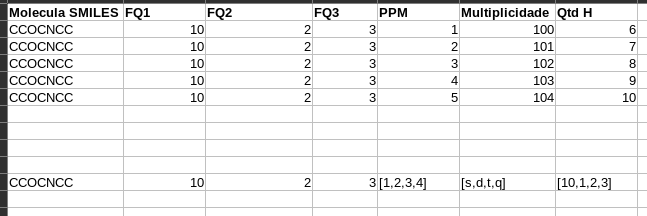